In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('/content/drive/MyDrive/hr_dashboard_data.csv')
df

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133
...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,29,Female,9,32,87,3.5,HR,Junior Developer,Jan-19,50051
196,Jeremy Miller,26,Male,7,45,28,2.8,IT,Junior Developer,Jan-21,46612
197,Daniel Pierce,22,Male,3,36,77,1.6,Finance,Intern,Jan-21,32992
198,Michael Hernandez,36,Female,23,96,50,3.4,Marketing,Manager,Jan-05,104216


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   200 non-null    object 
 1   Age                    200 non-null    int64  
 2   Gender                 200 non-null    object 
 3   Projects Completed     200 non-null    int64  
 4   Productivity (%)       200 non-null    int64  
 5   Satisfaction Rate (%)  200 non-null    int64  
 6   Feedback Score         200 non-null    float64
 7   Department             200 non-null    object 
 8   Position               200 non-null    object 
 9   Joining Date           200 non-null    object 
 10  Salary                 200 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 17.3+ KB


In [5]:
df.shape

(200, 11)

In [6]:
df.describe()

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,34.650000,11.455000,46.755000,49.935000,2.883000,76619.245000
std,9.797318,6.408849,28.530068,28.934353,1.123263,27082.299202
min,22.000000,0.000000,0.000000,0.000000,1.000000,30231.000000
25%,26.000000,6.000000,23.000000,25.750000,1.900000,53080.500000
50%,32.000000,11.000000,45.000000,50.500000,2.800000,80540.000000
75%,41.000000,17.000000,70.000000,75.250000,3.900000,101108.250000
max,60.000000,25.000000,98.000000,100.000000,4.900000,119895.000000


Exploratory Data Analysis

Counts of Candidates acc to Departments

In [7]:
dpt=df.groupby(['Department'],as_index=False)['Name'].count()
dpt

,Department,Name
0,Finance,41
1,HR,32
2,IT,38
3,Marketing,42
4,Sales,47


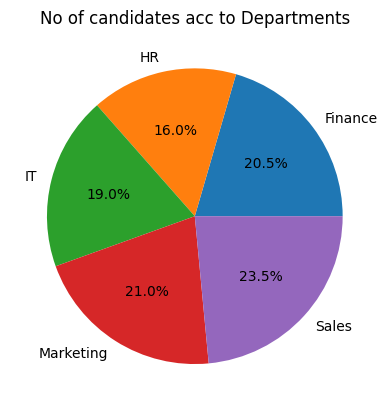

In [8]:
plt.pie(x='Name',labels='Department',autopct='%1.1f%%',data=dpt)
plt.title('No of candidates acc to Departments')
plt.show()

Candidates according to gender

In [9]:
gen_counts=df.groupby(['Gender'],as_index=False)['Name'].count()
gen_counts



,Gender,Name
0,Female,100
1,Male,100


Counts of Candidates acc to Position

In [10]:
df['Position'].value_counts()

Manager             40
Junior Developer    35
Analyst             33
Team Lead           32
Intern              30
Senior Developer    30
Name: Position, dtype: int64

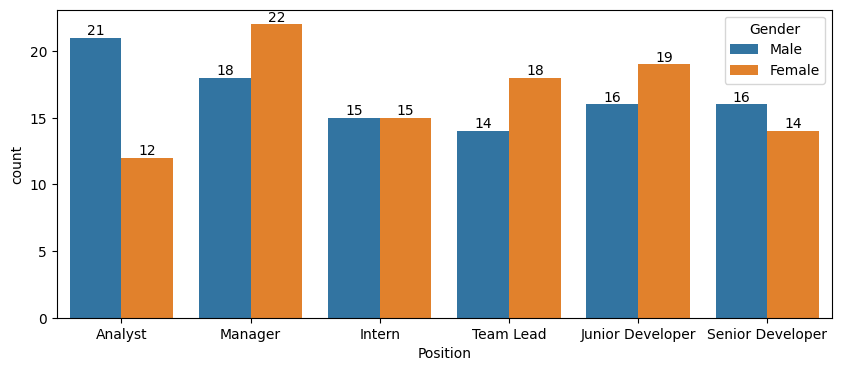

In [11]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x='Position',data=df,hue='Gender')
for container in ax.containers:
  ax.bar_label(container,fmt='%.f')
plt.show()

Counts of candidates according to Age

In [12]:
def conditions(i):
    if i <=20: return '0-20'
    if i > 20 and i <=30: return '20-30'
    if i > 30 and i <=40: return '30-40'
    if i > 40 and i <=50: return '40-50'
    if i > 50 and i <=60: return '50-60'
    if i > 60 and i <=70: return '60-70'
    if i > 70: return '>70'
    else : return 'Unavailable'

df['age_gp']=df['Age'].apply(conditions)


In [13]:
df


,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,age_gp
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596,20-30
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540,50-60
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292,20-30
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303,20-30
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,29,Female,9,32,87,3.5,HR,Junior Developer,Jan-19,50051,20-30
196,Jeremy Miller,26,Male,7,45,28,2.8,IT,Junior Developer,Jan-21,46612,20-30
197,Daniel Pierce,22,Male,3,36,77,1.6,Finance,Intern,Jan-21,32992,20-30
198,Michael Hernandez,36,Female,23,96,50,3.4,Marketing,Manager,Jan-05,104216,30-40


In [14]:
age_counts=df.groupby(['age_gp'],as_index=False)['Name'].count()
age_counts

,age_gp,Name
0,20-30,94
1,30-40,51
2,40-50,38
3,50-60,17


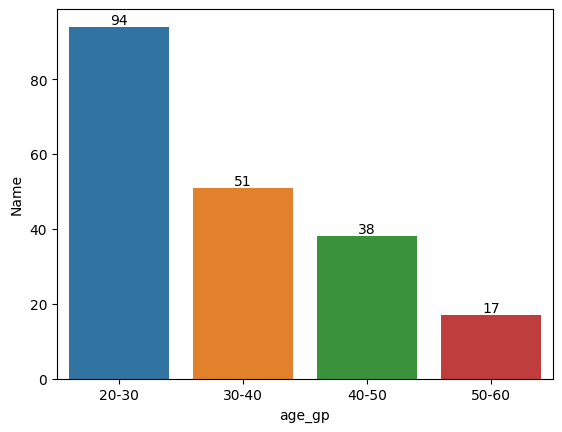

In [15]:
ax=sns.barplot(x='age_gp',y='Name',data=age_counts)
for bars in ax.containers:
  ax.bar_label(bars)


In [16]:
df['Age'].describe()

count    200.000000
mean      34.650000
std        9.797318
min       22.000000
25%       26.000000
50%       32.000000
75%       41.000000
max       60.000000
Name: Age, dtype: float64

Number of candidates acc to date joining

In [70]:
hcp=df.groupby(['Joining Date'],as_index=False)['Name'].count().drop(hcp.tail(2).index)
hcp

,Joining Date,Name
0,Jan-00,2
1,Jan-01,2
2,Jan-02,1
3,Jan-03,6
4,Jan-04,6
5,Jan-05,10
6,Jan-06,6
7,Jan-07,9
8,Jan-08,5
9,Jan-09,6


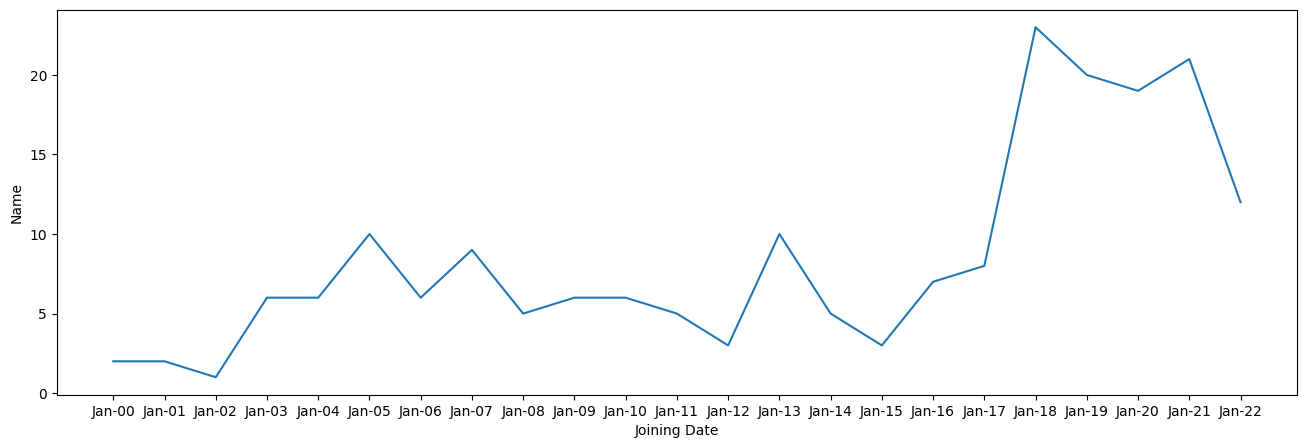

In [71]:
plt.figure(figsize=(16,5))
sns.lineplot(x='Joining Date',y='Name',data=hcp)
plt.show()

Number of employee according to project completed

In [54]:
proj_comp=df.groupby(['Projects Completed'],as_index=False)['Name'].count()
proj_comp.sort_values(by=['Name'],ascending=False)

,Projects Completed,Name
5,5,18
9,9,15
10,10,14
17,17,13
16,16,11
11,11,9
3,3,9
15,15,9
14,14,8
19,19,8


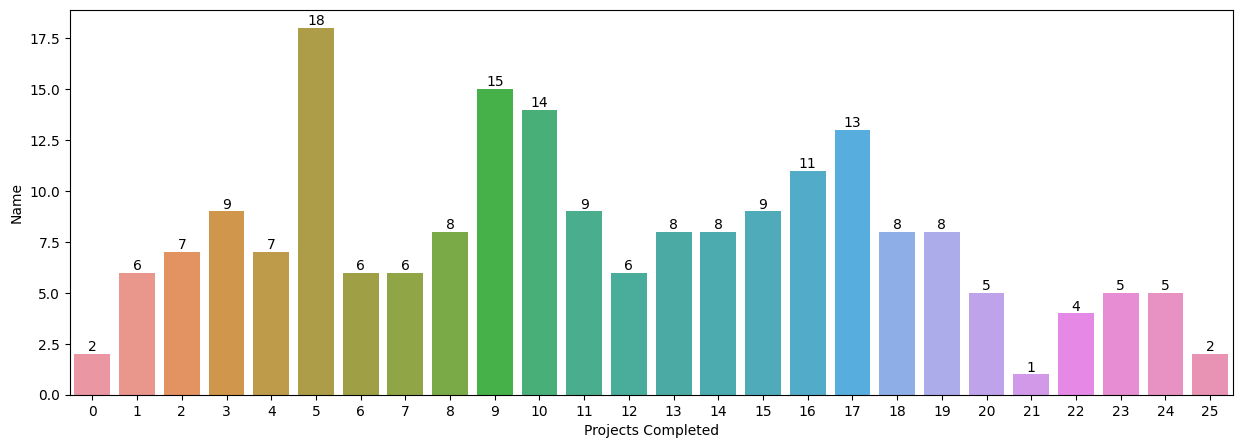

In [56]:
plt.figure(figsize=(15,5))
ax=sns.barplot(y='Name',x='Projects Completed',data=proj_comp)
for container in ax.containers:
  ax.bar_label(container)
plt.show()

In [72]:
df

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,age_gp
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596,20-30
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540,50-60
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292,20-30
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303,20-30
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,29,Female,9,32,87,3.5,HR,Junior Developer,Jan-19,50051,20-30
196,Jeremy Miller,26,Male,7,45,28,2.8,IT,Junior Developer,Jan-21,46612,20-30
197,Daniel Pierce,22,Male,3,36,77,1.6,Finance,Intern,Jan-21,32992,20-30
198,Michael Hernandez,36,Female,23,96,50,3.4,Marketing,Manager,Jan-05,104216,30-40


Comparison between Salary and productivity rate and satisfaction rate and salary according to their positions

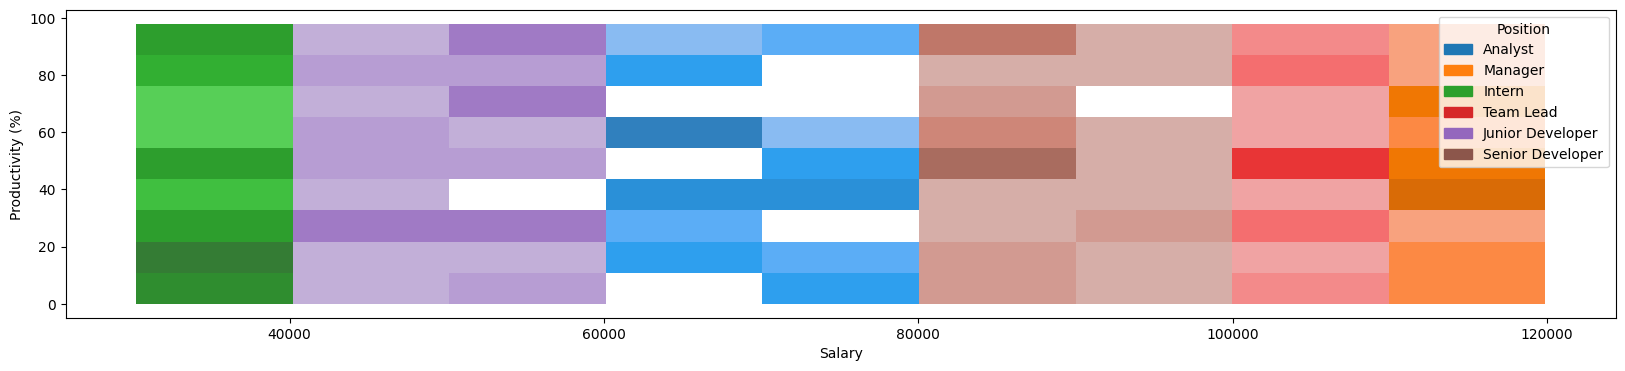

In [86]:
plt.figure(figsize=(20,4))
sns.histplot(y='Productivity (%)',x='Salary',hue='Position',data=df)
plt.show()

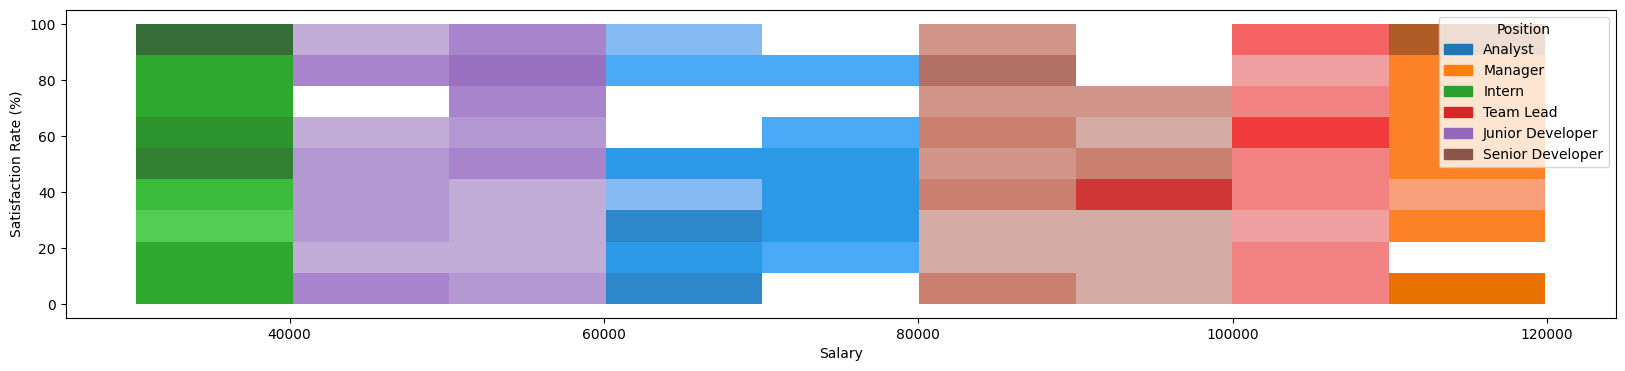

In [87]:
plt.figure(figsize=(20,4))
sns.histplot(y='Satisfaction Rate (%)',x='Salary',hue='Position',data=df)
plt.show()

Top 50 candidates basis of Feedback

In [37]:
top50=df.sort_values(by=['Feedback Score'],ascending=False).head(50)
top50

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,age_gp
30,Michelle Perez,29,Male,5,93,94,4.9,Marketing,Junior Developer,Jan-18,57478,20-30
96,Amy Carr,51,Female,24,75,37,4.9,Finance,Manager,Jan-08,114384,50-60
155,Matthew Moran,23,Female,9,59,11,4.9,Marketing,Junior Developer,Jan-21,55833,20-30
163,Michael Oneal,35,Male,25,69,58,4.9,IT,Manager,Jan-01,116928,30-40
122,Nicholas Johnson,26,Male,1,13,16,4.8,Marketing,Intern,Jan-22,31878,20-30
135,Alyssa Montoya,33,Female,14,55,26,4.8,Sales,Analyst,Jan-18,73623,30-40
173,Shannon Gray,41,Male,13,97,74,4.7,Marketing,Team Lead,Jan-16,97387,40-50
48,Elizabeth Bowen,33,Female,7,16,17,4.7,Sales,Analyst,Jan-19,73157,30-40
24,Tracy Briggs,40,Male,22,18,68,4.7,IT,Manager,Jan-12,100795,30-40
37,Jesse Solis,58,Female,19,3,72,4.7,IT,Manager,Jan-06,108122,50-60


In [38]:
top50.drop([30])

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,age_gp
96,Amy Carr,51,Female,24,75,37,4.9,Finance,Manager,Jan-08,114384,50-60
155,Matthew Moran,23,Female,9,59,11,4.9,Marketing,Junior Developer,Jan-21,55833,20-30
163,Michael Oneal,35,Male,25,69,58,4.9,IT,Manager,Jan-01,116928,30-40
122,Nicholas Johnson,26,Male,1,13,16,4.8,Marketing,Intern,Jan-22,31878,20-30
135,Alyssa Montoya,33,Female,14,55,26,4.8,Sales,Analyst,Jan-18,73623,30-40
173,Shannon Gray,41,Male,13,97,74,4.7,Marketing,Team Lead,Jan-16,97387,40-50
48,Elizabeth Bowen,33,Female,7,16,17,4.7,Sales,Analyst,Jan-19,73157,30-40
24,Tracy Briggs,40,Male,22,18,68,4.7,IT,Manager,Jan-12,100795,30-40
37,Jesse Solis,58,Female,19,3,72,4.7,IT,Manager,Jan-06,108122,50-60
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596,20-30


Salary

In [90]:
df['Salary'].describe()

count       200.000000
mean      76619.245000
std       27082.299202
min       30231.000000
25%       53080.500000
50%       80540.000000
75%      101108.250000
max      119895.000000
Name: Salary, dtype: float64

top 20 Salary acc to Department

In [91]:
topsal=df.sort_values(by=['Salary'],ascending=False).head(20)
topsal

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,age_gp
27,Susan Johnson,35,Male,17,26,81,3.9,Finance,Manager,Jan-11,119895,30-40
166,Anthony Barton,54,Male,20,54,89,2.6,Marketing,Manager,Jan-99,119567,50-60
78,Daniel Mata,51,Male,25,47,1,3.8,IT,Manager,Jan-07,119208,50-60
172,Joshua Fowler,58,Male,19,63,55,1.2,Marketing,Manager,Jan-13,119085,50-60
15,Melissa Galvan,40,Male,17,3,53,1.8,Sales,Manager,Jan-13,118466,30-40
158,Jon Hays,54,Male,22,38,96,1.9,Sales,Manager,Jan-11,117951,50-60
177,Patricia Ortega,48,Female,16,51,90,1.6,Sales,Manager,Jan-09,117458,40-50
163,Michael Oneal,35,Male,25,69,58,4.9,IT,Manager,Jan-01,116928,30-40
55,Harold Nguyen,38,Male,22,37,95,2.2,Finance,Manager,Jan-10,116888,30-40
133,Patrick Manning,51,Male,16,98,25,1.2,HR,Manager,Jan-00,116473,50-60


lowest 20 acc to salary

In [93]:
lowsal=df.sort_values(by=['Salary'],ascending=True).head(5)
lowsal

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,age_gp
120,Michael Rodriguez,26,Female,5,11,67,3.6,HR,Intern,Jan-22,30231,20-30
33,Steven Anderson,26,Female,3,0,35,1.3,Marketing,Intern,Jan-21,30509,20-30
76,Allison Smith,22,Male,0,23,60,2.4,HR,Intern,Jan-22,31230,20-30
194,Michael Baker,26,Female,2,95,54,3.4,IT,Intern,Jan-22,31328,20-30
131,John Elliott,23,Female,1,51,93,2.5,Sales,Intern,Jan-22,31456,20-30


This is a data of Hr Dashboard , In this data there are information of 200 employee.